In [1]:
import os
from fnmatch import fnmatch
from trainData_featExt_glcm import trainData_featExt_glcm
from trainData_featExt_gabor import trainData_featExt_gabor
import numpy as np
from PIL import Image
from filtering.filters import Median
from feature_extraction.glcm import Glcm
from feature_extraction.gabor import Gabor
import sklearn
import time
from gmm import Gmm
from sklearn import preprocessing
import pickle

In [ ]:
test_samples_feats_matrix_Gabor = np.load("test_samples_feats_matrix_Gabor.npy")
test_samples_feats_matrix_GLCM = np.load("test_samples_feats_matrix_GLCM.npy")
test_samples_feats_matrix_LBP = np.load("test_samples_feats_matrix_LBP.npy")


In [2]:
valid_samples_feats_matrix_Gabor = np.load("valid_samples_feats_matrix_Gabor.npy")
valid_samples_feats_matrix_GLCM = np.load("valid_samples_feats_matrix_GLCM.npy")
valid_samples_feats_matrix_LBP = np.load("valid_samples_feats_matrix_LBP.npy")

In [3]:
train_samples_feats_matrix_Gabor = np.load("train_samples_feats_matrix_Gabor.npy")
train_samples_feats_matrix_GLCM = np.load("train_samples_feats_matrix_GLCM.npy")
train_samples_feats_matrix_LBP = np.load("train_samples_feats_matrix_LBP.npy")

In [4]:
knn_model_Gabor = pickle.load( open( "KNN_Gabor_50", "rb" ))

In [5]:
knn_model_LBP = pickle.load( open( "KNN_LBP_500", "rb" ))

In [6]:
knn_model_GLCM = pickle.load( open( "KNN_GLCM_10", "rb" ))

In [7]:
#Ground truth
y1 = np.repeat(0, 6000) #normal
y2 = np.repeat(1, 4000) #abnormal
y = np.concatenate((y1,y2))

In [11]:
kth_dist2_Gabor, kth_ind2_Gabor = knn_model_Gabor.kneighbors(valid_samples_feats_matrix_Gabor)
kth_nearest_dist2_Gabor = kth_dist2_Gabor[:,-1]
kth_dist2_LBP, kth_ind2_Gabor = knn_model_LBP.kneighbors(valid_samples_feats_matrix_LBP)
kth_nearest_dist2_LBP = kth_dist2_LBP[:,-1]
kth_dist2_GLCM, kth_ind2_Gabor = knn_model_GLCM.kneighbors(valid_samples_feats_matrix_GLCM)
kth_nearest_dist2_GLCM = kth_dist2_GLCM[:,-1]

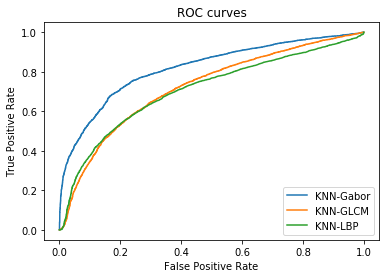

In [12]:
import matplotlib.pyplot as pl
import matplotlib
from skimage import io


Gabor_fpr,Gabor_tpr,Gabor_thresh = sklearn.metrics.roc_curve(y,kth_nearest_dist2_Gabor)
GLCM_fpr,GLCM_tpr,GLCM_thresh = sklearn.metrics.roc_curve(y,kth_nearest_dist2_GLCM)
LBP_fpr,LBP_tpr,LBP_thresh = sklearn.metrics.roc_curve(y,kth_nearest_dist2_LBP)

f,ax = pl.subplots(1,1)
ax.plot(Gabor_fpr,Gabor_tpr,label="KNN-Gabor")
ax.plot(GLCM_fpr,GLCM_tpr,label="KNN-GLCM")
ax.plot(LBP_fpr,LBP_tpr,label="KNN-LBP")

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC curves")
ax.legend(loc="lower right")

io.show()

In [13]:
f.savefig('KNN_GLCM-vs-Gabor-vs-LBP_valid.png')